In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# import pyarrow as pa
# import pyarrow.parquet as pq
# df = pd.read_csv(f'active_user_ratings_with_genres.csv')
# print(df.dtypes)
# table = pa.Table.from_pandas(df)
# pq.write_table(table, f'dataset/active_user_ratings_with_genres.parquet')

In [3]:
df = pd.read_parquet('dataset/active_user_ratings_with_genres.parquet')

In [4]:
df

,userId,movieId,rating,timestamp,title,genres,datetime,year,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,12,296,5.0,1119354604,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2005-06-21 11:50:04,2005,0,0,...,0,0,0,0,0,0,0,1,0,0
1,76,296,4.5,1285219680,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2010-09-23 05:28:00,2010,0,0,...,0,0,0,0,0,0,0,1,0,0
2,187,296,4.5,1277374442,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2010-06-24 10:14:02,2010,0,0,...,0,0,0,0,0,0,0,1,0,0
3,345,296,5.0,984709701,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2001-03-16 02:28:21,2001,0,0,...,0,0,0,0,0,0,0,1,0,0
4,357,296,3.5,1367156671,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2013-04-28 13:44:31,2013,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385770,162067,203064,2.5,1560035272,The Hotshots (1968),Comedy,2019-06-08 23:07:52,2019,0,0,...,0,0,0,0,0,0,0,0,0,0
4385771,162271,92648,3.0,1327978630,BookWars (2000),Comedy|Crime|Documentary,2012-01-31 02:57:10,2012,0,0,...,0,0,0,0,0,0,0,0,0,0
4385772,162271,92946,1.0,1329627154,"Souler Opposite, The (1998)",Comedy|Romance,2012-02-19 04:52:34,2012,0,0,...,0,0,0,0,0,1,0,0,0,0
4385773,162271,95230,2.5,1340566357,Macbeth in Manhattan (1999),Drama,2012-06-24 19:32:37,2012,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns


Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'datetime', 'year', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [6]:
unique_users_count = df['userId'].nunique()
print("Number of unique users:", unique_users_count)
#only users with more than or equal to 5 years of data are considered

Number of unique users: 5938


In [7]:
target_user_id=12

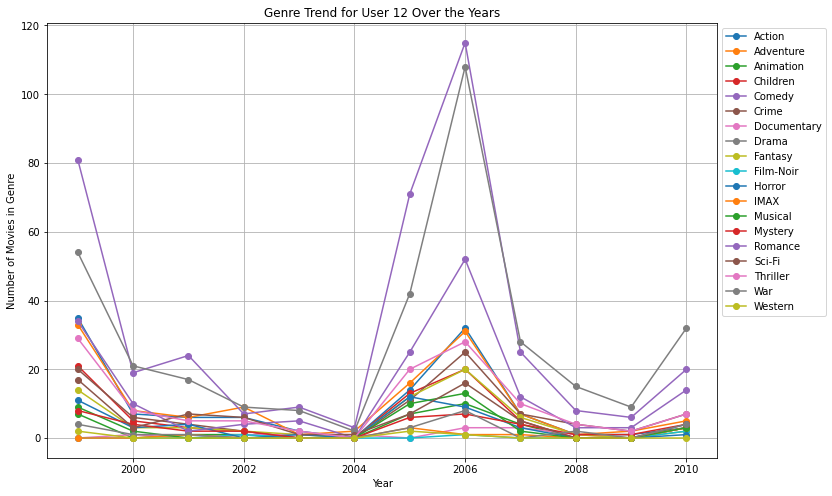

In [8]:
# Filter the DataFrame for the target user
user_df = df[df['userId'] == target_user_id]

# Group by year and sum the genres for the target user
genre_trend = user_df.groupby('year').sum().loc[:, 'Action':'Western']

# Plotting the genre trend
plt.figure(figsize=(12, 8))
plt.plot(genre_trend, marker='o')
plt.title(f'Genre Trend for User {target_user_id} Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies in Genre')
plt.legend(genre_trend.columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


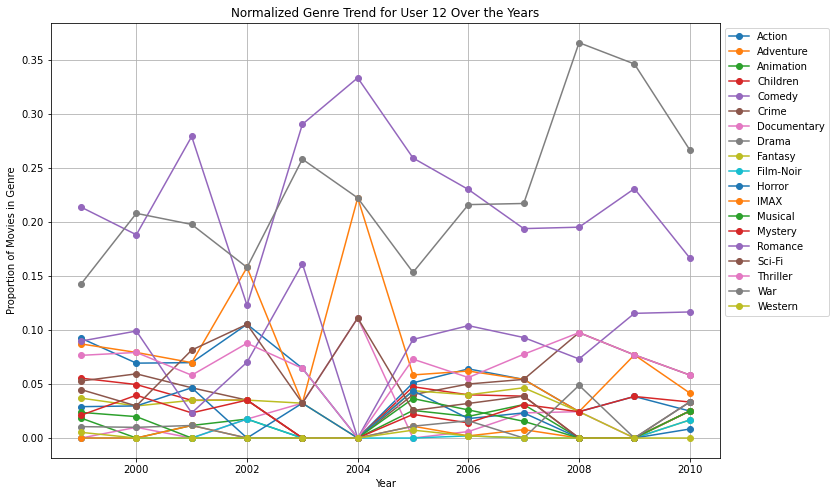

In [9]:
# Normalize the genre counts by dividing by the total number of movies watched each year
normalized_genre_trend = genre_trend.div(genre_trend.sum(axis=1), axis=0)

# Plotting the normalized genre trend
plt.figure(figsize=(12, 8))
plt.plot(normalized_genre_trend, marker='o')
plt.title(f'Normalized Genre Trend for User {target_user_id} Over the Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Movies in Genre')
plt.legend(normalized_genre_trend.columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [10]:
def plot_temporal_for_user(target_user_id):
    # Filter the DataFrame for the target user
    user_df = df[df['userId'] == target_user_id]

    # Group by year and sum the genres for the target user
    genre_trend = user_df.groupby('year').sum().loc[:, 'Action':'Western']

    # Normalize the genre counts by dividing by the total number of movies watched each year
    normalized_genre_trend = genre_trend.div(genre_trend.sum(axis=1), axis=0)

    # Select the top 5 prevalent genres
    top5_genres = normalized_genre_trend.sum().nlargest(5).index

    # Plotting the normalized genre trend with top 5 in color and others in gray
    plt.figure(figsize=(12, 8))

    # Plotting all genres in gray
    plt.plot(normalized_genre_trend.loc[:, ~normalized_genre_trend.columns.isin(top5_genres)], color='gray', alpha=0.5)

    # Plotting top 5 genres in color
    for genre in top5_genres:
        plt.plot(normalized_genre_trend[genre], marker='o', label=genre)

    plt.title(f'Normalized Genre Trend for User {target_user_id} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Proportion of Movies in Genre')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


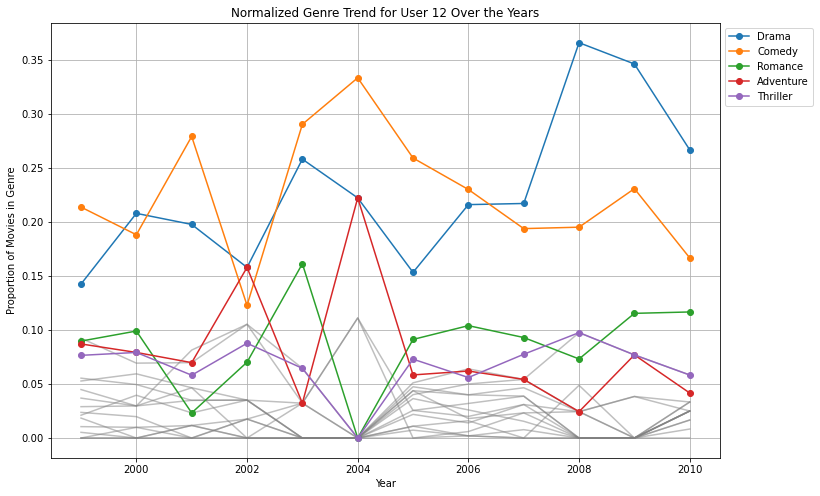

In [11]:
plot_temporal_for_user(target_user_id)

In [12]:
seed=42

## Collaborative filtering

### User - Based (Cosine similarity)

In [13]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
from surprise.dump import dump, load

In [14]:
def preprocess_dataset_cf(frac):
    # Define a Reader object to parse the dataframe
    reader = Reader(rating_scale=(0.5, 5))

    # Load the dataset
    sampled_df = df.sample(frac=frac, random_state=seed)
    data = Dataset.load_from_df(sampled_df[['userId', 'movieId', 'rating']], reader)

    # Split the dataset into training and testing sets
    trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
    return trainset, testset

In [15]:
def train_user_based_cf():
    # Use the User-Based Collaborative Filtering algorithm (here, KNNBasic)
    sim_options = {
        'name': 'cosine',
        'user_based': True  # User-Based Collaborative Filtering
    }
    algo = KNNBasic(sim_options=sim_options)
    algo.fit(trainset)
    return algo


In [16]:
trainset, testset=preprocess_dataset_cf(0.1)
# algo=train_user_based_cf()
# predictions = algo.test(testset)
# accuracy.rmse(predictions)

In [17]:
user_based_cf_model_filename = 'models/user_based_model_collab_filt'
# dump(user_based_cf_model_filename, algo=algo, predictions=predictions, verbose=1)

In [18]:
_,user_based_cf_loaded_model = load(user_based_cf_model_filename)
predictions = user_based_cf_loaded_model.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9031


0.9031163660892896

In [19]:
def predict_cf(target_user_id,loaded_model):
    all_movies = df['movieId'].unique()

    # Get movies rated by the target user
    rated_movies = df[df['userId'] == target_user_id]['movieId'].unique()

    # Find unrated movies for the target user
    unrated_movies = list(set(all_movies) - set(rated_movies))
    # Generate predictions for the unrated movies
    predictions = [loaded_model.predict(target_user_id, movie_id) for movie_id in unrated_movies]

    # Sort the predictions by estimated rating (descending order)
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Get the top N recommended movies
    top_n = 10  # Adjust the number of recommendations as needed
    top_movies = sorted_predictions[:top_n]

    # Print the recommended movies
    print(f"Top {top_n} recommended movies for User {target_user_id}:")
    for movie in top_movies:
        movie_id = movie.iid
        movie_info = df[df['movieId'] == movie_id].iloc[0]
        movie_title = movie_info['title']
        movie_genres = movie_info['genres']
        print(f"Movie Title: {movie_title}, Genres: {movie_genres}, Estimated Rating: {movie.est}")


Top 10 recommended movies for User 12:
Movie Title: Two Bits (1995), Genres: Drama, Estimated Rating: 5
Movie Title: Nobody Loves Me (Keiner liebt mich) (1994), Genres: Comedy|Drama, Estimated Rating: 5
Movie Title: Pie in the Sky (1996), Genres: Comedy|Romance, Estimated Rating: 5
Movie Title: Ship of Theseus (2013), Genres: Drama, Estimated Rating: 5
Movie Title: A Royal Night Out (2015), Genres: Drama|Romance|Thriller, Estimated Rating: 5
Movie Title: Beyond Silence (Jenseits der Stille) (1996), Genres: Drama, Estimated Rating: 5
Movie Title: Best Man, The (Testimone dello sposo, Il) (1998), Genres: Comedy|Drama|Romance, Estimated Rating: 5
Movie Title: Chain of Fools (2000), Genres: Comedy|Crime, Estimated Rating: 5
Movie Title: All the Rage (It's the Rage) (1999), Genres: Drama, Estimated Rating: 5
Movie Title: Fellini's Roma (Roma) (1972), Genres: Drama, Estimated Rating: 5


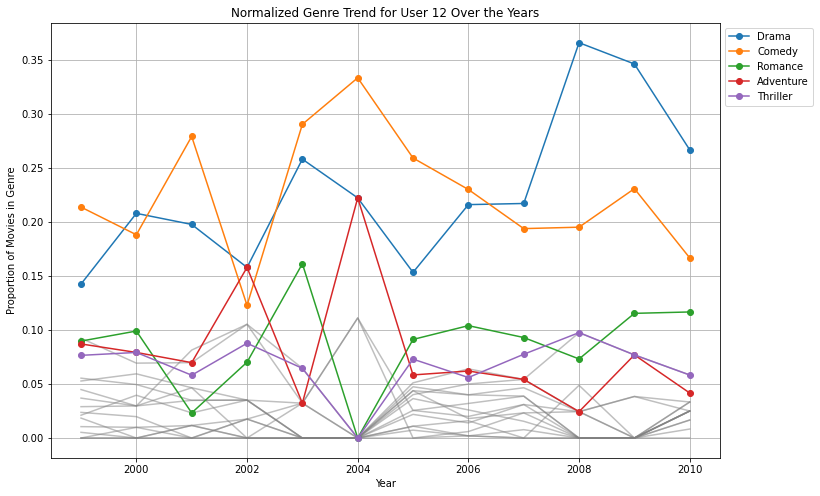

In [20]:
target_user_id = 12
predict_cf(target_user_id,user_based_cf_loaded_model)
plot_temporal_for_user(target_user_id)

Top 10 recommended movies for User 357:
Movie Title: Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994), Genres: Drama, Estimated Rating: 5
Movie Title: Careful (1992), Genres: Comedy|Horror, Estimated Rating: 5
Movie Title: Last Time I Saw Paris, The (1954), Genres: Drama, Estimated Rating: 5
Movie Title: Quest for Camelot (1998), Genres: Adventure|Animation|Children|Fantasy|Musical, Estimated Rating: 5
Movie Title: Beefcake (1999), Genres: Drama, Estimated Rating: 5
Movie Title: Chain of Fools (2000), Genres: Comedy|Crime, Estimated Rating: 5
Movie Title: Defying Gravity (1997), Genres: Drama, Estimated Rating: 5
Movie Title: WWII IN HD (2009), Genres: Documentary|War, Estimated Rating: 5
Movie Title: Come Undone (Presque Rien) (2000), Genres: Drama|Romance, Estimated Rating: 5
Movie Title: Fidel (2001), Genres: Documentary, Estimated Rating: 5


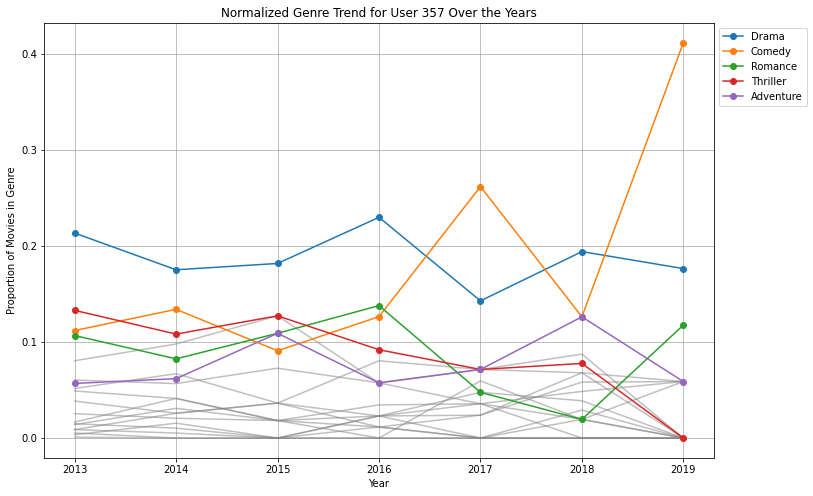

In [21]:
target_user_id = 357
predict_cf(target_user_id,user_based_cf_loaded_model)
plot_temporal_for_user(target_user_id)

### Item - Based  (Cosine similarity)

In [22]:
def train_item_based_cf():
    # Use the User-Based Collaborative Filtering algorithm (here, KNNBasic)
    sim_options = {
        'name': 'cosine',
        'user_based': False  # User-Based Collaborative Filtering
    }
    algo = KNNBasic(sim_options=sim_options)
    algo.fit(trainset)
    return algo


In [23]:
# trainset, testset=preprocess_dataset_cf(0.1)
# algo=train_item_based_cf()
# predictions = algo.test(testset)
# accuracy.rmse(predictions)

In [24]:
item_based_cf_model_filename = 'models/item_based_model_collab_filt'
# dump(item_based_cf_model_filename, algo=algo, predictions=predictions, verbose=1)

In [25]:
_,item_based_cf_loaded_model = load(item_based_cf_model_filename)
predictions = item_based_cf_loaded_model.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9329


0.9329390434685083

Top 10 recommended movies for User 12:
Movie Title: Amityville: A New Generation (1993), Genres: Horror, Estimated Rating: 5
Movie Title: Anna Karenina (1997), Genres: Drama|Romance, Estimated Rating: 5
Movie Title: Hanging Garden, The (1997), Genres: Drama|Romance, Estimated Rating: 5
Movie Title: Bootleggers (1961), Genres: Comedy|Crime, Estimated Rating: 5
Movie Title: My Love (2006), Genres: Animation|Drama, Estimated Rating: 5
Movie Title: The Cow (1990), Genres: Animation|Drama, Estimated Rating: 5
Movie Title: Family Viewing (1987), Genres: Drama, Estimated Rating: 5
Movie Title: Lakeboat (2000), Genres: Comedy, Estimated Rating: 5
Movie Title: Harvey Girls, The (1946), Genres: Comedy|Musical|Western, Estimated Rating: 5
Movie Title: Blackrock (1997), Genres: Drama|Thriller, Estimated Rating: 5


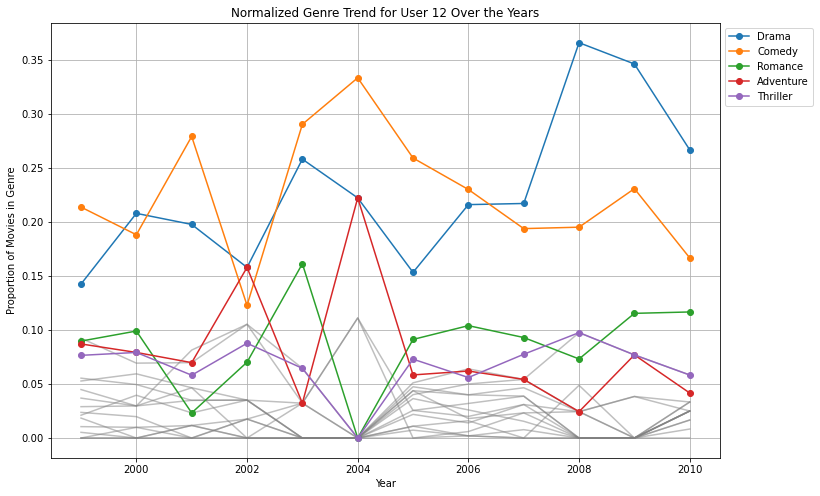

In [26]:
target_user_id = 12
predict_cf(target_user_id,item_based_cf_loaded_model)
plot_temporal_for_user(target_user_id)

Top 10 recommended movies for User 357:
Movie Title: Barbarians at the Gate (1993), Genres: Drama, Estimated Rating: 4.75
Movie Title: Hospital, The (1971), Genres: Comedy|Drama, Estimated Rating: 4.5
Movie Title: Makioka Sisters, The (Sasame-yuki) (1983), Genres: Drama|Romance, Estimated Rating: 4.5
Movie Title: Idle Class, The (1921), Genres: Comedy, Estimated Rating: 4.5
Movie Title: Dragon Gate Inn (Dragon Inn) (Long men kezhan) (1967), Genres: Action|Adventure, Estimated Rating: 4.5
Movie Title: Sister Street Fighter (Onna hissatsu ken) (1974), Genres: Action|Drama, Estimated Rating: 4.5
Movie Title: Hawaii (1966), Genres: Drama, Estimated Rating: 4.5
Movie Title: Rodnye (Close Relations), Genres: Documentary, Estimated Rating: 4.5
Movie Title: Street of Crocodiles (1986), Genres: Animation, Estimated Rating: 4.5
Movie Title: Young Dragons: Kung Fu Kids (1986), Genres: Comedy, Estimated Rating: 4.5


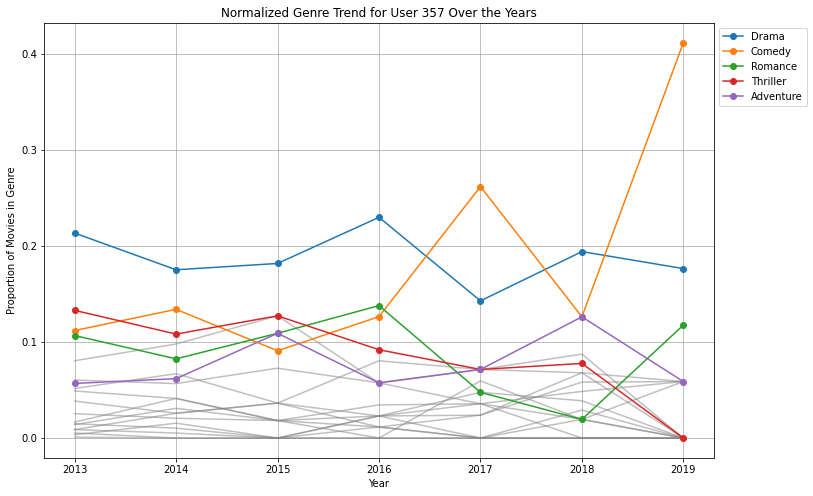

In [27]:
target_user_id = 357
predict_cf(target_user_id,item_based_cf_loaded_model)
plot_temporal_for_user(target_user_id)

### Matrix Factorization 
Decomposing the user-item interaction matrix 

In [28]:
from surprise import SVD

In [29]:
def train_item_based_cf():
    algo = SVD()
    algo.fit(trainset)
    return algo

In [30]:
# trainset, testset=preprocess_dataset_cf(0.1)
# algo=train_item_based_cf()
# predictions = algo.test(testset)
# accuracy.rmse(predictions)

In [31]:
matrix_fact_model_filename = 'models/matrix_factorization_model'
# dump(matrix_fact_model_filename, algo=algo, predictions=predictions, verbose=1)

In [32]:
_,matrix_fact_loaded_model = load(matrix_fact_model_filename)
predictions = matrix_fact_loaded_model.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8280


0.8279680027880691

Top 10 recommended movies for User 12:
Movie Title: Planet Earth (2006), Genres: Documentary, Estimated Rating: 4.254072521055466
Movie Title: Passion of Joan of Arc, The (Passion de Jeanne d'Arc, La) (1928), Genres: Drama, Estimated Rating: 4.248263663414856
Movie Title: Grave of the Fireflies (Hotaru no haka) (1988), Genres: Animation|Drama|War, Estimated Rating: 4.2359294034812764
Movie Title: Rififi (Du rififi chez les hommes) (1955), Genres: Crime|Film-Noir|Thriller, Estimated Rating: 4.221234534561846
Movie Title: Sunset Blvd. (a.k.a. Sunset Boulevard) (1950), Genres: Drama|Film-Noir|Romance, Estimated Rating: 4.195540313969301
Movie Title: Intouchables (2011), Genres: Comedy|Drama, Estimated Rating: 4.172575833269487
Movie Title: Rear Window (1954), Genres: Mystery|Thriller, Estimated Rating: 4.160086078759265
Movie Title: Trouble in Paradise (1932), Genres: Comedy|Romance, Estimated Rating: 4.1590949880190236
Movie Title: Inception (2010), Genres: Action|Crime|Drama|Mystery|Sci

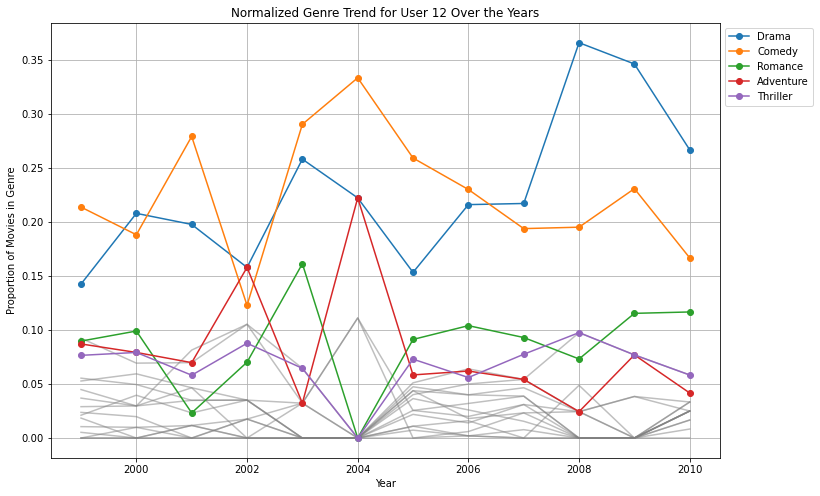

In [33]:
target_user_id = 12
predict_cf(target_user_id,matrix_fact_loaded_model)
plot_temporal_for_user(target_user_id)

### DL based

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\siva\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
df['encoded_user'] = user_encoder.fit_transform(df['userId'])
df['encoded_movie'] = movie_encoder.fit_transform(df['movieId'])

In [36]:
# Split the data into training and testing sets
sampled_df = df.sample(frac=0.1, random_state=seed)
train_df, test_df = train_test_split(sampled_df, test_size=0.2, random_state=42)

# Define the embedding size for users and movies
embedding_size = 50

# Define the model architecture
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')

user_embedding = Embedding(input_dim=df['encoded_user'].nunique(), output_dim=embedding_size)(user_input)
movie_embedding = Embedding(input_dim=df['encoded_movie'].nunique(), output_dim=embedding_size)(movie_input)

user_flatten = Flatten()(user_embedding)
movie_flatten = Flatten()(movie_embedding)

concat = Concatenate()([user_flatten, movie_flatten])
dense_1 = Dense(128, activation='relu')(concat)
dense_2 = Dense(64, activation='relu')(dense_1)
output = Dense(1)(dense_2)

model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')




In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 50)                296900    ['user_input[0][0]']          
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 50)                2504050   ['movie_input[0][0]']         
                                                                                              

In [38]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model and store the history
# history = model.fit([train_df['encoded_user'], train_df['encoded_movie']], train_df['rating'], 
#                     epochs=5, batch_size=512, validation_split=0.1, callbacks=[early_stopping], verbose=1)




In [39]:
# # Plot the training and testing loss
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [41]:
test_loss = model.evaluate([test_df['encoded_user'], test_df['encoded_movie']], test_df['rating'])

2742/2742 [==============================] - 6s 2ms/step - loss: 12.4990


In [40]:
# Save the model
dl_model_filename = 'models\deep_learning_cf_model'
# model.save(dl_model_filename)

In [42]:

dl_cf_model = tf.keras.models.load_model(dl_model_filename)

# Use the loaded model for predictions or evaluation
test_loss = dl_cf_model.evaluate([test_df['encoded_user'], test_df['encoded_movie']], test_df['rating'])


2742/2742 [==============================] - 5s 2ms/step - loss: 0.6959


## Content-Based Filtering (using NLP)

Tags should be used for this

In [19]:
# import nltk
# nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [130]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


In [131]:
df['content'] = df['title'] + ' ' + df['genres'].fillna('')
sampled_df = df.sample(frac=0.1, random_state=seed)

In [132]:
def train_word2vec_model():
    # Tokenize the content
    sampled_df['tokenized_content'] = sampled_df['content'].apply(word_tokenize)

    # Train Word2Vec model on the tokenized content
    word2vec_model = Word2Vec(sentences=sampled_df['tokenized_content'], vector_size=100, window=5, min_count=1, workers=4)
    return word2vec_model

In [133]:
# Function to compute unique movie embeddings
def compute_unique_movie_embeddings(titles):
    unique_titles = set()
    unique_embeddings = []

    def compute_movie_embedding(title):
        nonlocal unique_titles, unique_embeddings

        if title not in unique_titles:
            unique_titles.add(title)

            tokenized_title = word_tokenize(title)
            if all(word in word2vec_model.wv for word in tokenized_title):
                title_embedding = np.sum([word2vec_model.wv[word] for word in tokenized_title], axis=0)
                unique_embeddings.append((title, title_embedding))
    
    titles.apply(compute_movie_embedding)

    return unique_embeddings


In [150]:
def predict_content_based_using_NLP(user_id,word2vec_model):
    # Compute unique movie embeddings using NumPy
    unique_movie_embeddings = compute_unique_movie_embeddings(sampled_df['content'])

    # Extract titles and embeddings
    unique_titles, unique_embeddings = zip(*unique_movie_embeddings)

    # Convert to NumPy arrays
    unique_embeddings = np.array(unique_embeddings)

    # Get movies rated by the user
    user_movies = df[df['userId'] == user_id]

    # Tokenize the user's rated movie titles
    user_movies['tokenized_title'] = user_movies['content'].apply(lambda text: word_tokenize(text))

    # Aggregate embeddings for the user's rated movies
    user_embedding = None
    for _, movie_row in user_movies.iterrows():
        movie_title = movie_row['tokenized_title']
        if movie_title and all(word in word2vec_model.wv for word in movie_title):
            title_embedding = sum(word2vec_model.wv[word] for word in movie_title)
            if user_embedding is None:
                user_embedding = title_embedding
            else:
                user_embedding += title_embedding

    # Normalize the user embedding
    user_embedding /= len(user_movies)

    # Ensure that the arrays are properly shaped for cosine_similarity
    user_embedding = user_embedding.reshape(1, -1)
    unique_embeddings = np.vstack([emb.reshape(1, -1) for emb in unique_embeddings])

    # Compute the pairwise similarity scores
    sim_scores = cosine_similarity(user_embedding, unique_embeddings)

    # Get the movie indices
    movie_indices = np.argsort(sim_scores[0])[::-1]

    # Exclude movies already rated by the user
    user_rated_titles = set(user_movies['content'])
    movie_indices = [idx for idx in movie_indices if unique_titles[idx] not in user_rated_titles]

    # Return the top N most similar movies
    top_n = 10

    recommendations = pd.DataFrame({'title': [list(unique_titles)[idx] for idx in movie_indices[:top_n]], 'genres': sampled_df['genres'].iloc[movie_indices[:top_n]]})
    print(recommendations)
    return recommendations

In [151]:
# word2vec_model=train_word2vec_model()

                                                     title  \
2310147                    Cup, The (Phörpa) (1999) Comedy   
3354501  Terrible Kids (Enfants terribles, Les) (Strang...   
2508441  Gendarme Gets Married, The (Le gendarme se mar...   
476879          Foul King, The (Banchikwang) (2000) Comedy   
1114419  Working Class Goes to Heaven, The (a.k.a. Lulu...   
3170215   Slingshot, The (Kådisbellan) (1993) Comedy|Drama   
2458107       Greatest Love, The (Europa '51) (1952) Drama   
1290660  Chess Players, The (Shatranj Ke Khilari) (1977...   
798525         Idiots, The (Idioterne) (1998) Comedy|Drama   
4376930  Cigarette Girl of Mosselprom, The (Papirosnits...   

                                      genres  
2310147  Action|Adventure|Animation|Children  
3354501                               Action  
2508441    Action|Adventure|Comedy|Drama|War  
476879               Mystery|Sci-Fi|Thriller  
1114419      Animation|Children|Comedy|Crime  
3170215                        Dram

C:\Users\siva\AppData\Local\Temp\ipykernel_384748\590767342.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



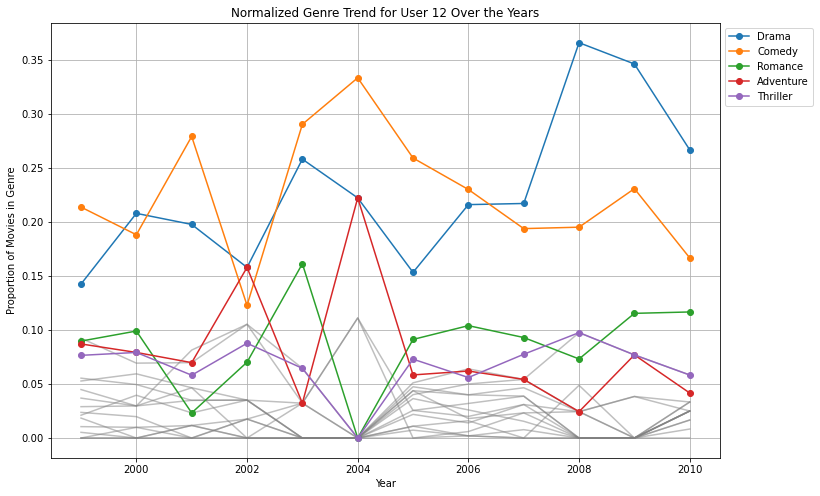

In [152]:
user_id = 12
predict_content_based_using_NLP(user_id,word2vec_model)
plot_temporal_for_user(target_user_id)

In [147]:
# Save the Word2Vec model to a file
model_filename = "models/word2vec_model.bin"
# word2vec_model.save(model_filename)

In [148]:
# Now, let's load the saved model
loaded_word2vec_model = Word2Vec.load(model_filename)

In [149]:
predict_content_based_using_NLP(user_id,loaded_word2vec_model)

                                                     title  \
3942938  Anthropophagus: The Grim Reaper (Antropophagus...   
3037394              Swindle, The (Rien ne va plus) (1997)   
1162308  Violent City (Family, The) (Città violenta) (1...   
685971       Stranger, The (Agantuk) (Visitor, The) (1991)   
2536295          Wrong Move, The (Falsche Bewegung) (1975)   
1400300  Season of the Witch (Hungry Wives) (Jack's Wif...   
785635                        Child, The (L'enfant) (2005)   
2370824  Hitch Hike (Autostop rosso sangue) (Naked Prey...   
2762630             Magic Flute, The (Trollflöjten) (1975)   
1802221         47 Ronin, The (Genroku Chûshingura) (1941)   

                                                 genres  
3942938                       Adventure|Children|Comedy  
3037394                                   Drama|Romance  
1162308  Action|Adventure|Comedy|Crime|Mystery|Thriller  
685971                                           Comedy  
2536295                    

C:\Users\siva\AppData\Local\Temp\ipykernel_384748\1308417026.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,genres
3942938,Anthropophagus: The Grim Reaper (Antropophagus...,Adventure|Children|Comedy
3037394,"Swindle, The (Rien ne va plus) (1997)",Drama|Romance
1162308,"Violent City (Family, The) (Città violenta) (1...",Action|Adventure|Comedy|Crime|Mystery|Thriller
685971,"Stranger, The (Agantuk) (Visitor, The) (1991)",Comedy
2536295,"Wrong Move, The (Falsche Bewegung) (1975)",Action|Adventure|Romance
1400300,Season of the Witch (Hungry Wives) (Jack's Wif...,Drama|Mystery|Thriller
785635,"Child, The (L'enfant) (2005)",Comedy|Drama|Fantasy|Romance
2370824,Hitch Hike (Autostop rosso sangue) (Naked Prey...,Animation|Horror|Mystery|Thriller
2762630,"Magic Flute, The (Trollflöjten) (1975)",Drama
1802221,"47 Ronin, The (Genroku Chûshingura) (1941)",Action|Adventure|Mystery|Romance|Thriller


                                                     title  \
3354501  Terrible Kids (Enfants terribles, Les) (Strang...   
184798    47 Ronin, The (Genroku Chûshingura) (1941) Drama   
4376930  Cigarette Girl of Mosselprom, The (Papirosnits...   
499      Golden Coach, The (Le carrosse d'or) (1953) Co...   
2458107       Greatest Love, The (Europa '51) (1952) Drama   
1659386        Tough Ones, The (Häjyt) (1999) Action|Drama   
272312      Phantom Carriage, The (Körkarlen) (1921) Drama   
2310147                    Cup, The (Phörpa) (1999) Comedy   
2756998      Preacher, The (De dominee) (2004) Crime|Drama   
2665742   Leaning Tower, The (Kalteva torni) (2006) Comedy   

                                      genres  
3354501                               Action  
184798               Action|Adventure|Sci-Fi  
4376930                          Documentary  
499              Comedy|Crime|Drama|Thriller  
2458107                         Comedy|Drama  
1659386                            

C:\Users\siva\AppData\Local\Temp\ipykernel_384748\590767342.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



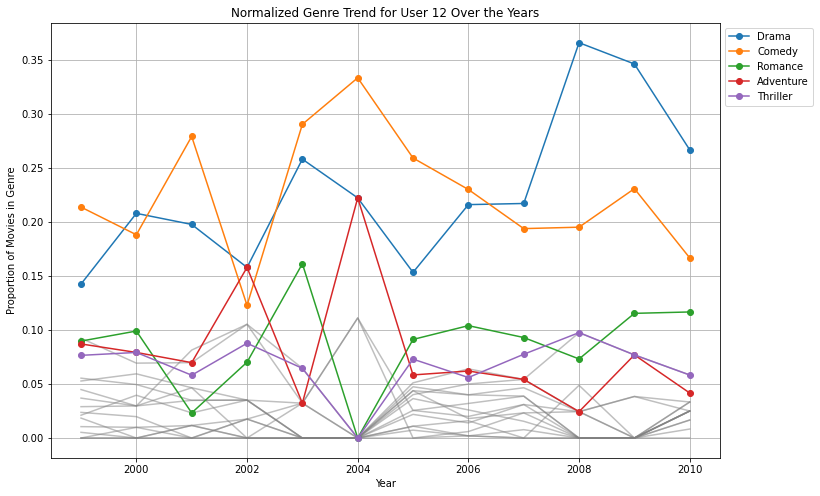

In [153]:
user_id = 357
predict_content_based_using_NLP(user_id,word2vec_model)
plot_temporal_for_user(target_user_id)

## Hybrid model

Give out predictions by combining any 2 or more of the above models

## Results

In [125]:
import plotly.graph_objects as go

# Model names and corresponding RMSE scores
model_names = ["User-Based", "Item-Based", "Matrix Factorization", "Deep Learning Based"]
rmse_scores = [0.9031, 0.9329, 0.8280, 0.6959]

# Sorting the models based on RMSE scores
sorted_data = sorted(zip(rmse_scores, model_names))
rmse_scores, model_names = zip(*sorted_data)

# Creating a bar chart with Plotly and rotating it
fig = go.Figure()

fig.add_trace(go.Bar(
    y=model_names,  # Switching x and y to rotate the plot
    x=rmse_scores,
    marker_color='lightblue',  # You can set a single color for all bars
    orientation='h',  # Setting the orientation to horizontal
))

fig.update_layout(
    yaxis=dict(title='Models'),  # Switching xaxis and yaxis labels
    xaxis=dict(title='RMSE Scores'),
    title='Comparison of RMSE Scores for Four Models',
    barmode='group',
)

fig.show()



In [14]:
import plotly.graph_objects as go

# Model names and corresponding RMSE scores
model_names = ["Matrix Factorization", "Deep Learning Based"]
rmse_scores = [0.8280, 0.6959]

# Sorting the models based on RMSE scores
sorted_data = sorted(zip(rmse_scores, model_names))
rmse_scores, model_names = zip(*sorted_data)

# Creating a bar chart with Plotly and rotating it
fig = go.Figure()

fig.add_trace(go.Bar(
    y=model_names,  # Switching x and y to rotate the plot
    x=rmse_scores,
    marker_color='lightblue',  # You can set a single color for all bars
    orientation='h',  # Setting the orientation to horizontal
))

fig.update_layout(
    yaxis=dict(title='Models'),  # Switching xaxis and yaxis labels
    xaxis=dict(title='RMSE Scores'),
    title='Comparison of RMSE Scores',
    barmode='group',
)

fig.show()



In [16]:
import plotly.graph_objects as go

# Model names and corresponding RMSE scores
model_names = ["Matrix Factorization", "Deep Learning Based"]
rmse_scores = [0.8280, 0.6959]

# Sorting the models based on RMSE scores
sorted_data = sorted(zip(rmse_scores, model_names))
rmse_scores, model_names = zip(*sorted_data)

# Creating a bar chart with Plotly and rotating it
fig = go.Figure()

fig.add_trace(go.Bar(
    y=model_names,  # Switching x and y to rotate the plot
    x=rmse_scores,
    marker_color='lightblue',  # Different color for each bar
    orientation='h',  # Setting the orientation to horizontal
    text=rmse_scores,  # Displaying the RMSE scores on the bars
    textposition='inside',  # Positioning the text inside the bars
    texttemplate='%{text:.4f}',  # Formatting the text to display 4 decimal places
))

fig.update_layout(
    yaxis=dict(title='Models', autorange="reversed"),  # Switching xaxis and yaxis labels, reversing the order of y-axis
    xaxis=dict(title='RMSE Scores'),
    title=dict(text='Comparison of RMSE Scores', x=0.5),  # Centering the title
    barmode='group',
    margin=dict(l=100, r=20, t=60, b=80),  # Adjusting margins for better layout
    showlegend=False,  # Removing legend as it's not needed in this case
)

fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.8)  # Adding border to bars

fig.show()

